<a href="https://colab.research.google.com/github/VaishaliPapneja/Titanic_Disaster_Analysis/blob/master/Live_Session_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

Factors Assumptions
- Sex
- Age
- Class


In [3]:
train = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Age'].isnull().sum()

177

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
100 *(train.isnull().sum()/len(train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
test =train[train['Survived']==1]
len(train[(test['Sex']=='female') & (train['Survived']==1)])/len(train)

0.2615039281705948

In [22]:
pd.crosstab(train.Survived, train.Sex, normalize=True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [0]:
train['Age_group'] = train['Age'].apply(lambda x: 0 if x<=16 else (1 if x <= 32 else (2 if x <=48 else (3 if x<=64 else 4))))

pd.cut is used to create bins


In [0]:
train['Age_bin'] = pd.cut(train['Age'], bins=[0,16,32,48,64,200], labels=[0,1,2,3,4])

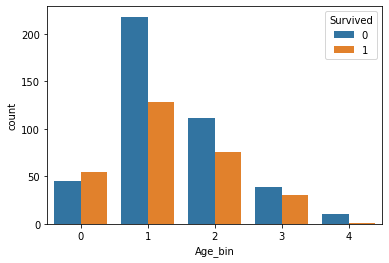

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot("Age_bin", hue='Survived', data=train)

In [24]:
pd.crosstab(train.Survived, train.Age_group)

Age_group,0,1,2,3,4
Survived,,,,,
0,45,218,112,39,135
1,55,128,76,30,53


In [29]:
#Missing Value Treatment

100 *((train.isnull().sum())/len(train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Age_group       0.000000
Age_bin        19.865320
dtype: float64

In [0]:
train.drop(['Age_bin', 'Age_group','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [31]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
train['Embarked'] = train['Embarked'].fillna('S')

In [36]:
100 *((train.isnull().sum())/len(train))

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Fare            0.00000
Embarked        0.00000
dtype: float64

In [32]:
train['Age'].quantile(0.99)

65.87

In [37]:
#Use iterative imputer to impute Age column
#Limitation - We should have all data in numerical format
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [38]:
#Lets tag sex to 0 and 1
train['Sex'].replace(['female', 'male'], [0,1], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [39]:
#Replace S C Q : 0 1 2
#else use LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [40]:
train['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [0]:
#Iterative imputer removes column names
#preserving column names
train_col = train.columns

In [44]:
from fancyimpute import IterativeImputer
train_clean = pd.DataFrame(IterativeImputer().fit_transform(train), columns=train_col)
train_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [45]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Sex            891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(9)
memory usage: 62.8 KB


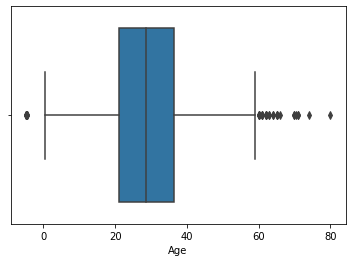

In [50]:
train['Age'].describe()

sns.boxplot(x=train_clean['Age'])

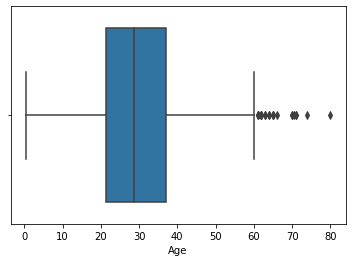

In [56]:
train_clean_v2 = train_clean[train_clean['Age']>=0]
sns.boxplot(train_clean_v2['Age'])

In [58]:
train_clean_v2['Age'].describe(percentiles = [0,0.25,0.5,0.75,0.99,1])

count    884.000000
mean      29.536509
std       13.412019
min        0.420000
0%         0.420000
25%       21.440078
50%       28.591186
75%       37.000000
99%       65.000000
100%      80.000000
max       80.000000
Name: Age, dtype: float64

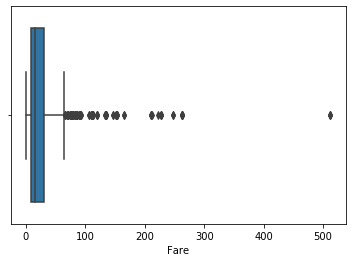

In [59]:
sns.boxplot(train_clean_v2['Fare'])

In [0]:
train_clean.drop(train_clean.index[train_clean['Age']<0], inplace=True)

In [61]:
train_clean.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,445.717195,0.386878,2.303167,0.648190,29.536509,0.463801,0.368778,31.908483,1.532805
std,256.872441,0.487311,0.837101,0.477805,13.412019,0.882600,0.796210,49.778200,0.793553
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,0.000000,21.440078,0.000000,0.000000,7.895800,1.000000
50%,446.500000,0.000000,3.000000,1.000000,28.591186,0.000000,0.000000,14.454200,2.000000
75%,667.250000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,30.500000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [0]:
train_clean.drop(train_clean.index[train_clean['Fare']>300], inplace=True)

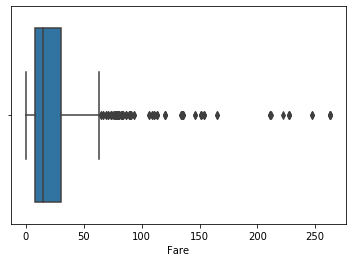

In [64]:
#WE cant proceed with outliered data as it will affect final data
#but if we remove all outliers - we will loose data + pattern
# So, we will remove some of outliers

sns.boxplot(train_clean['Fare'])

In [66]:
train_clean.describe(percentiles=[0,0.25,0.5,0.75,0.90,1])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,445.331442,0.384790,2.307605,0.648127,29.516770,0.465380,0.368899,30.272544,1.538025
std,256.922510,0.486822,0.835055,0.477826,13.430554,0.883687,0.797088,41.192295,0.789833
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
0%,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.581108,0.000000,0.000000,14.454200,2.000000
75%,666.000000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,30.500000,2.000000
90%,801.000000,1.000000,3.000000,1.000000,48.000000,1.000000,1.000000,77.287500,2.000000
100%,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,263.000000,2.000000


0.3847900113507378

In [68]:
train_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [69]:
#Convert Float to int - except age and fare
train_clean.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [0]:
for i in ['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
  train_clean[i] = pd.to_numeric(train_clean[i])
  train_clean[i] = train_clean[i].astype(int)

In [73]:
train_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [74]:
len(train_clean[train_clean['Survived']==1])/len(train_clean)

0.3847900113507378

In [77]:
#Testing my own
for i in ['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
  train_clean_v2[i] = pd.to_numeric(train_clean_v2[i], downcast='signed')
  #train_clean[i] = train_clean[i].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
#testing my own
train_clean_v2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [79]:
####Modelling


#Create dummies for categorical data 
#divide into X and Y
#scaling
#modelling

#get_dummies() - column should be in object/categorical format
for i in ['Pclass','SibSp','Parch','Embarked']:
  train_clean[i] = train_clean[i].astype(str)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null object
Sex            881 non-null int64
Age            881 non-null float64
SibSp          881 non-null object
Parch          881 non-null object
Fare           881 non-null float64
Embarked       881 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 68.8+ KB


In [81]:
cat_cols = train_clean[['Pclass','SibSp','Parch','Embarked']]
train_dummies = pd.get_dummies(cat_cols,drop_first=True)
train_dummies.head()

,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
train_clean.drop(['Pclass','SibSp','Parch','Embarked'], axis=1, inplace=True)

In [84]:
train_clean = pd.concat([train_clean, train_dummies], axis=1)
train_clean.head()

,PassengerId,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,1,0,1,22.0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,71.2833,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,0,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,1,35.0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
X = train_clean.drop(['Survived', 'PassengerId'], axis=1)
Y = train_clean['Survived']

In [0]:
X_cols = X.columns

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size=0.3, random_state=100)

In [0]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
X_train = pd.DataFrame(X_train, columns = X_cols)
X_train.head()

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,0.742723,-1.004533,-0.098247,1.972027,-1.102646,-0.579850,-0.187867,-0.121766,-0.152499,-0.080845,-0.375154,-0.30682,-0.069957,-0.069957,-0.069957,0.0,-0.319324,0.612372
1,0.742723,-0.259736,-0.558061,-0.507093,0.906910,-0.579850,-0.187867,-0.121766,-0.152499,-0.080845,-0.375154,-0.30682,-0.069957,-0.069957,-0.069957,0.0,-0.319324,0.612372
2,0.742723,0.112662,0.179388,1.972027,-1.102646,1.724585,-0.187867,-0.121766,-0.152499,-0.080845,2.665570,-0.30682,-0.069957,-0.069957,-0.069957,0.0,-0.319324,-1.632993
3,0.742723,-0.110777,0.078362,1.972027,-1.102646,-0.579850,-0.187867,-0.121766,-0.152499,-0.080845,2.665570,-0.30682,-0.069957,-0.069957,-0.069957,0.0,-0.319324,0.612372
4,0.742723,1.974653,0.141437,-0.507093,-1.102646,-0.579850,-0.187867,-0.121766,-0.152499,-0.080845,-0.375154,-0.30682,-0.069957,-0.069957,-0.069957,0.0,-0.319324,-1.632993


In [105]:
X_train.corr()

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
Sex,1.000000,0.107584,-0.236027,-0.052166,0.144249,-0.186743,-0.047361,-0.079151,-0.000517,0.017822,-0.133860,-0.207503,-0.045474,-0.045474,-0.045474,NaN,-0.055421,0.123917
Age,0.107584,1.000000,0.091934,0.024006,-0.342446,0.037545,-0.136684,-0.156976,-0.250544,-0.102286,-0.188437,-0.269215,0.051301,0.044354,0.053038,NaN,-0.075446,0.029714
Fare,-0.236027,0.091934,1.000000,-0.109880,-0.472230,0.189594,0.081420,0.228307,0.001249,0.034687,0.085125,0.243091,0.001217,-0.007535,0.006122,NaN,-0.125573,-0.117513
Pclass_2,-0.052166,0.024006,-0.109880,1.000000,-0.559143,0.114032,0.037804,-0.061747,-0.077331,-0.040996,0.103463,0.030987,0.022336,-0.035475,-0.035475,NaN,-0.134150,0.184017
Pclass_3,0.144249,-0.342446,-0.472230,-0.559143,1.000000,-0.210861,0.008580,0.028866,0.138302,0.073319,-0.056555,-0.035845,0.016584,0.063445,0.063445,NaN,0.244566,-0.035293
SibSp_1,-0.186743,0.037545,0.189594,0.114032,-0.210861,1.000000,-0.108935,-0.070606,-0.088426,-0.046878,0.260227,0.008858,0.120647,0.066910,0.013173,NaN,-0.081881,-0.039708
SibSp_2,-0.047361,-0.136684,0.081420,0.037804,0.008580,-0.108935,1.000000,-0.022876,-0.028649,-0.015188,0.119938,0.038065,-0.013143,-0.013143,-0.013143,NaN,0.032626,-0.025565
SibSp_3,-0.079151,-0.156976,0.228307,-0.061747,0.028866,-0.070606,-0.022876,1.000000,-0.018569,-0.009844,0.118878,0.203876,-0.008518,-0.008518,-0.008518,NaN,-0.038883,0.074566
SibSp_4,-0.000517,-0.250544,0.001249,-0.077331,0.138302,-0.088426,-0.028649,-0.018569,1.000000,-0.012329,0.141521,0.263964,-0.010668,-0.010668,-0.010668,NaN,0.101665,-0.004447
SibSp_5,0.017822,-0.102286,0.034687,-0.040996,0.073319,-0.046878,-0.015188,-0.009844,-0.012329,1.000000,-0.030329,0.263494,-0.005656,-0.005656,-0.005656,NaN,-0.025816,0.049507


In [0]:
X_test = pd.DataFrame(X_test, columns = X_cols)

In [110]:
#Create logistic Model using Default Params
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
y_test_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.8075471698113208

In [122]:
from sklearn import metrics
lr2 = LogisticRegression(penalty = 'l1')
lr2.fit(X_train,y_train)
y_test_pred2 = lr2.predict(X_test)
lr2.score(X_test, y_test)  #Accuracy 
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_test_pred)))
print("Sensitivity: {0}".format(metrics.recall_score(y_test,y_test_pred)))


print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_test_pred2)))
print("Sensitivity: {0}".format(metrics.recall_score(y_test,y_test_pred2)))

Accuracy: 0.8075471698113208
Sensitivity: 0.7254901960784313
Accuracy: 0.8075471698113208
Sensitivity: 0.7254901960784313


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [126]:
#statsmodels - it helps in working on models in statistical values
#p and VIF values - 

#C - Regularization Parameter
# Lambda: Tunes/Controls the amount of weight  you want to put in regularization parameter
#C is inverse of lambda - smaller value menas higher/strnger the regularization

#lr3 = LogisticRegression(C=0.1, penalty = 'l1', class_weight='balanced')
lr3 = LogisticRegression(C=0.1, penalty = 'l1', class_weight={0:0.4,1:0.6})
lr3.fit(X_train,y_train)
y_test_pred3 = lr3.predict(X_test)
lr3.score(X_test, y_test)  #Accuracy 
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_test_pred)))
print("Sensitivity: {0}".format(metrics.recall_score(y_test,y_test_pred)))


print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_test_pred3)))
print("Sensitivity: {0}".format(metrics.recall_score(y_test,y_test_pred3)))

Accuracy: 0.8075471698113208
Sensitivity: 0.7254901960784313
Accuracy: 0.7962264150943397
Sensitivity: 0.7450980392156863


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
glr = LogisticRegression()
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2], 'penalty': ['l1', 'l2'], 'class_weight':  [{0:0.4, 1: 0.6}, 'balanced']}
grid_clf_acc = GridSearchCV(glr, param_grid = params,scoring = 'recall', cv=5)
grid_clf_acc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1,
                               2],
                         'class_weight': [{0: 0.4, 1: 0.6}, 'balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recal

In [135]:
grid_clf_acc.best_params_

{'C': 0.3, 'class_weight': 'balanced', 'penalty': 'l1'}

In [139]:
grid_clf_acc.best_score_

0.8018530671456203

In [140]:
grid_clf_acc.best_index_

22

In [148]:
lr4 = LogisticRegression(C=0.3, penalty = 'l1', class_weight='balanced')
lr4.fit(X_train,y_train)
y_test_pred4 = lr4.predict(X_test)
lr4.score(X_test, y_test)  #Accuracy 
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_test_pred4)))
print("Sensitivity: {0}".format(metrics.recall_score(y_test,y_test_pred4)))

Accuracy: 0.7811320754716982
Sensitivity: 0.7549019607843137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [149]:
#Check Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity: {0}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.8150943396226416
Sensitivity: 0.6862745098039216


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
 #{ "criterion" : ["gini", "entropy"], 
 #"min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000], 'class_weight': [{0:0.4, 1: 0.6}, 'balanced']}

In [0]:
#{'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 700}

In [150]:
rf = RandomForestClassifier(criterion='gini', class_weight='balanced',min_samples_leaf=1, min_samples_split=16,n_estimators=700)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity: {0}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.8339622641509434
Sensitivity: 0.7647058823529411


In [157]:
pd.concat((pd.DataFrame(X.columns, columns=['Variables']), pd.DataFrame(rf.feature_importances_,columns=['Importance'])), axis=1).sort_values(by='Importance', ascending=False)

,Variables,Importance
0,Sex,0.336819
2,Fare,0.227846
1,Age,0.183145
4,Pclass_3,0.105947
3,Pclass_2,0.023916
17,Embarked_2,0.023642
5,SibSp_1,0.022233
10,Parch_1,0.019937
11,Parch_2,0.011475
16,Embarked_1,0.010315
